In [33]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Read Raw Files of Covid Cases and Vaccines

In [34]:
covid_df = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
vaccine_df = pd.read_csv('../data/vaccine_with_protocol.csv')

In [35]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [36]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


##### Rename the Column Headers

In [37]:
vaccine_df = vaccine_df.rename(columns={'vacc_date':'date','zipcode':'zip','count_given':'vaccines','dose_nbr':'dose'})
covid_df =covid_df.rename(columns={'Specimen Collection Date':'date','Zip':'zip','Cases':'cases'})

##### Change of Data Types
The Covid Zipcodes are changed from float64 to String in Covid_df
The Vaccine Zipcode are changed from float64 to String   
The dates are changed to date type   

In [38]:
covid_df['zip'] = covid_df['zip'].astype('Int64').astype(str)
covid_df['date']= pd.to_datetime(covid_df['date'])
vaccine_df['zip'] = vaccine_df['zip'].astype('Int64').astype(str)
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])

In [39]:
covid_df.info()
print('\n***********************************************************\n')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8832 non-null   datetime64[ns]
 1   zip     8832 non-null   object        
 2   cases   8832 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 207.1+ KB

***********************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6694 non-null   datetime64[ns]
 1   zip       6694 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB


#### Drop Rows that do not have ZIP numbers in the Vaccine_df

In [40]:
vaccine_df.info()
vaccine_df.dropna(inplace=True)
print('After Dropping \n\n')
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6694 non-null   datetime64[ns]
 1   zip       6694 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB
After Dropping 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6686 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6686 non-null   datetime64[ns]
 1   zip       6686 non-null   object        
 2   vaccines  6686 non-null   float64       
 3   dose      6686 non-null   float64       
 4   protocol  6686 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memo

##### Clean up the count of Vaccines
The team has decided the one vaccine is considered an individual to be vaccinated

In [41]:
vac_clean_df=vaccine_df[vaccine_df['dose']==1]
print('vaccine_df sum -',vaccine_df['vaccines'].sum())
print('vac_clean sum -',vac_clean_df['vaccines'].sum())

vaccine_df sum - 334890.0
vac_clean sum - 220038.0


###### Replace the Data Frame of vaccination cleaned to the original df

In [42]:
vaccine_df=vac_clean_df
vaccine_df

,date,zip,vaccines,dose,protocol
0,2020-12-12,37215,1.0,1.0,two-shot
2,2020-12-14,37215,1.0,1.0,two-shot
3,2020-12-15,37221,1.0,1.0,two-shot
4,2020-12-16,37215,1.0,1.0,two-shot
5,2020-12-17,37013,16.0,1.0,two-shot
...,...,...,...,...,...
6686,2021-04-07,37221,81.0,1.0,two-shot
6687,2021-04-07,37221,2.0,1.0,one-shot
6689,2021-04-07,37228,9.0,1.0,two-shot
6691,2021-04-07,<NA>,8.0,1.0,two-shot


Text(0.5, 1.0, 'Vaccines by date')

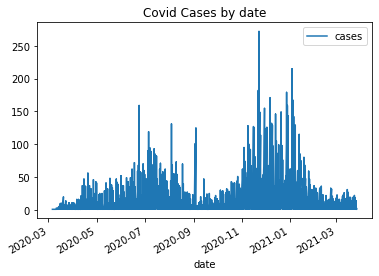

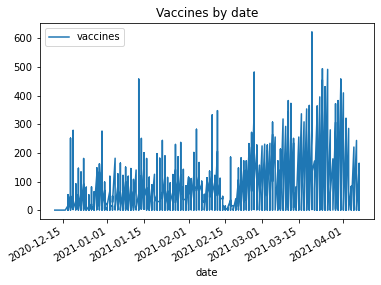

In [43]:
covid_df.plot.line('date','cases')
plt.title('Covid Cases by date')

vaccine_df.plot.line('date','vaccines')
plt.title('Vaccines by date')

#### Read Ethnicity Population and Gather Total Population Figures to % cases and % vaccines

In [44]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
pop_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 0)

###### Clean the pop_df file to extract only total population

In [45]:

#Drop columns with Error next to each of the columns
pop_df = pop_df[pop_df.columns.drop(list(pop_df.filter(regex='Error')))]
#Drop a Level of 'Value' headers that mean nothing to the data
pop_df.columns = pop_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics or you can choose to select certain rows into a DF
# Two separate data frame created. One of only the total population and the other to represent different races
#ethnicity_df = pop_df.drop([0,1,9,10,12,13,14,15,16,17,18,19,20])
pop_df = pop_df.iloc[[0],:]

# #Rotate the dataframe so that Zip can be column and the race data set across
pop_df= pop_df.set_index('Unnamed: 0_level_0').T.reset_index()
#ethnicity_df= ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()
# #Rename the index row to Zip
pop_df = pop_df.rename(columns={'index':'zip','Total:':'population'})
#ethnicity_df=ethnicity_df.rename(columns={'index':'zip','Total:':'total','Two or more races:':'Two or more races',
#                                        'Hispanic or Latino:':'Hispanic or Latino'})

pop_df

Unnamed: 0_level_0,zip,population
0,37010,4966
1,37012,2185
2,37013,97939
3,37014,2835
4,37015,17665
...,...,...
113,38552,157
114,38560,1405
115,38563,3410
116,38567,685


In [46]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
ethnicity_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 1)
#ethnicity_df

### Merge Population by Zip to Covid Cases & Vaccine Cases as a %
    - First summarize the cases and vaccines by Zip 
    - Merge population dataframe to each of the dataframes
    

#### Create dataframe for covid by zip

In [47]:
#cases per zipcode
covid_by_zip =covid_df.groupby('zip',as_index=False)['cases'].sum()
#sort by case Number
covid_by_zip  =covid_by_zip.sort_values('cases', ascending=False)
#Remove rows that have <NA.
covid_by_zip.drop(index=[31], axis=0, inplace=True)
covid_by_zip

,zip,cases
0,37013,13354
18,37211,10233
16,37209,5072
14,37207,4729
6,37115,4574
4,37076,4279
28,37221,3910
24,37217,3907
21,37214,3508
10,37203,3346


Text(0.5, 1.0, 'Nashville Covid Cases by zip')

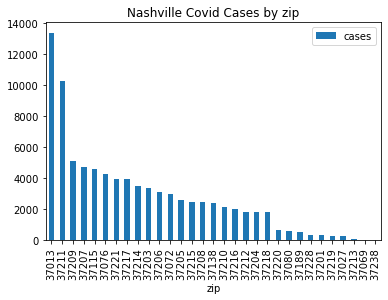

In [48]:
covid_by_zip.plot.bar('zip','cases')
plt.title('Nashville Covid Cases by zip')

##### Create dataframe for vaccines by zip

In [49]:
#vaccines per zipcode
vac_by_zip =vaccine_df.groupby('zip',as_index=False)['vaccines'].sum()
vac_by_zip.vaccines.sum()
#vaccines by zip
vac_by_zip =vac_by_zip.sort_values('vaccines', ascending=False)
#Remove rows that have <NA.
vac_by_zip.drop(index=[31], axis=0, inplace=True)
vac_by_zip

,zip,vaccines
18,37211,19175.0
0,37013,18465.0
28,37221,17222.0
12,37205,14666.0
16,37209,13600.0
22,37215,12132.0
4,37076,11113.0
13,37206,10124.0
14,37207,9255.0
21,37214,9198.0


Text(0.5, 1.0, 'Nashville Vaccines by zip')

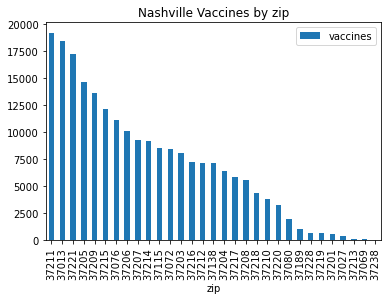

In [50]:
vac_by_zip.plot.bar('zip','vaccines')
plt.title('Nashville Vaccines by zip')

#### Identify the Largest and Smallest Covid and Vaccine Numbers

In [51]:
top5cases = covid_by_zip.nlargest(5,'cases')
top5vaccines = vac_by_zip.nlargest(5,'vaccines')
bottom5cases = covid_by_zip.nsmallest(5,'cases')
bottom5vaccines = vac_by_zip.nsmallest(5,'vaccines')

print('The Top Covid Cases by Zip\n\n',top5cases)
print('\n***********************************\n')
print('The Bottom Covid Cases by Zip\n\n',bottom5cases)
print('\n***********************************\n')
print('The Top Vaccine Numbers by Zip\n\n',top5vaccines)
print('\n***********************************\n')
print('The Bottom Vaccine Numbers by Zip\n\n',bottom5vaccines)

The Top Covid Cases by Zip

       zip  cases
0   37013  13354
18  37211  10233
16  37209   5072
14  37207   4729
6   37115   4574

***********************************

The Bottom Covid Cases by Zip

       zip  cases
30  37238      3
2   37069     16
20  37213     65
1   37027    231
26  37219    270

***********************************

The Top Vaccine Numbers by Zip

       zip  vaccines
18  37211   19175.0
0   37013   18465.0
28  37221   17222.0
12  37205   14666.0
16  37209   13600.0

***********************************

The Bottom Vaccine Numbers by Zip

       zip  vaccines
30  37238       3.0
2   37069      50.0
20  37213      72.0
1   37027     352.0
9   37201     576.0


###### Merge Covid and Vaccine Dataframes as Zip is the same for both data sets

In [52]:
cov_plus_vac = pd.merge(left=covid_by_zip, right=vac_by_zip, how='left', left_on='zip', right_on='zip')
cov_plus_vac

,zip,cases,vaccines
0,37013,13354,18465.0
1,37211,10233,19175.0
2,37209,5072,13600.0
3,37207,4729,9255.0
4,37115,4574,8520.0
5,37076,4279,11113.0
6,37221,3910,17222.0
7,37217,3907,5837.0
8,37214,3508,9198.0
9,37203,3346,8029.0


##### Bring Total Population by Zip into the cov_plus_vac dataframe 

In [53]:
c_v_zip= pd.merge(left=cov_plus_vac, right=pop_df, how='left', left_on='zip', right_on='zip')
c_v_zip

,zip,cases,vaccines,population
0,37013,13354,18465.0,97939.0
1,37211,10233,19175.0,75955.0
2,37209,5072,13600.0,38664.0
3,37207,4729,9255.0,39544.0
4,37115,4574,8520.0,40343.0
5,37076,4279,11113.0,40161.0
6,37221,3910,17222.0,41017.0
7,37217,3907,5837.0,30146.0
8,37214,3508,9198.0,30528.0
9,37203,3346,8029.0,15091.0


In [54]:
top5cases = c_v_zip.nlargest(5,'cases')
top5vaccines = c_v_zip.nlargest(5,'vaccines')
bottom5cases = c_v_zip.nsmallest(5,'cases')
bottom5vaccines = c_v_zip.nsmallest(5,'vaccines')

print('The Top Covid Cases by Zip\n\n',top5cases)
print('\n***********************************\n')
print('The Bottom Covid Cases by Zip\n\n',bottom5cases)
print('\n***********************************\n')
print('The Top Vaccine Numbers by Zip\n\n',top5vaccines)
print('\n***********************************\n')
print('The Bottom Vaccine Numbers by Zip\n\n',bottom5vaccines)

The Top Covid Cases by Zip

      zip  cases  vaccines  population
0  37013  13354   18465.0     97939.0
1  37211  10233   19175.0     75955.0
2  37209   5072   13600.0     38664.0
3  37207   4729    9255.0     39544.0
4  37115   4574    8520.0     40343.0

***********************************

The Bottom Covid Cases by Zip

       zip  cases  vaccines  population
30  37238      3       3.0         NaN
29  37069     16      50.0     20467.0
28  37213     65      72.0        95.0
27  37027    231     352.0     56117.0
26  37219    270     638.0      1154.0

***********************************

The Top Vaccine Numbers by Zip

       zip  cases  vaccines  population
1   37211  10233   19175.0     75955.0
0   37013  13354   18465.0     97939.0
6   37221   3910   17222.0     41017.0
12  37205   2566   14666.0     23790.0
2   37209   5072   13600.0     38664.0

***********************************

The Bottom Vaccine Numbers by Zip

       zip  cases  vaccines  population
30  37238      3     

###### Get Percentage of Vaccines and Covid Cases to the Population by Zip

In [55]:
# First Method of doing calculation
c_v_zip['perc_cases'] = round(c_v_zip.cases / c_v_zip.population * 100, 2)
# Second Method of doing Calculation
c_v_zip['perc_vacc'] =c_v_zip.apply(lambda row: round(100* float(row['vaccines']) / float(row['population']),2), axis=1)
# c_v_zip['perc_of_pop'] = round(c_v_zip.population / c_v_zip.population.sum() * 100,2)
# c_v_zip['perc_cases_by_pop'] = round(c_v_zip.cases / c_v_zip.population.sum() * 100,2)
# c_v_zip['perc_vaccines_by_pop'] = round(c_v_zip.vaccines / c_v_zip.population.sum() * 100,2)
c_v_zip.head()

,zip,cases,vaccines,population,perc_cases,perc_vacc
0,37013,13354,18465.0,97939.0,13.64,18.85
1,37211,10233,19175.0,75955.0,13.47,25.25
2,37209,5072,13600.0,38664.0,13.12,35.17
3,37207,4729,9255.0,39544.0,11.96,23.40
4,37115,4574,8520.0,40343.0,11.34,21.12


###### Drop the industrial Zip beltway from the records

In [56]:
c_v_zip = c_v_zip[c_v_zip['zip'] != '37213']
c_v_zip 
#confirm Line index 20 is removed. 

,zip,cases,vaccines,population,perc_cases,perc_vacc
0,37013,13354,18465.0,97939.0,13.64,18.85
1,37211,10233,19175.0,75955.0,13.47,25.25
2,37209,5072,13600.0,38664.0,13.12,35.17
3,37207,4729,9255.0,39544.0,11.96,23.40
4,37115,4574,8520.0,40343.0,11.34,21.12
5,37076,4279,11113.0,40161.0,10.65,27.67
6,37221,3910,17222.0,41017.0,9.53,41.99
7,37217,3907,5837.0,30146.0,12.96,19.36
8,37214,3508,9198.0,30528.0,11.49,30.13
9,37203,3346,8029.0,15091.0,22.17,53.20


Text(0.5, 1.0, '% of Covid Cases by zip')

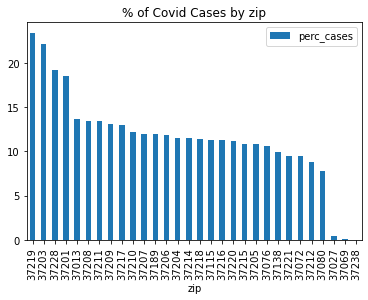

In [57]:
c_v_zip=c_v_zip.sort_values('perc_cases',ascending=False)
c_v_zip.plot.bar('zip','perc_cases')
plt.title('% of Covid Cases by zip')

##### Read and Upload file Hispanic or Latino Origin by Race

In [58]:
# Read the data file in Excel into the application, Skipping the header and loading sheet 0 is actual value sheet 1 = %
ethnicity_df = pd.read_excel('..\data\hispanic\originbyrace.xlsx', skiprows = 1, header=[0, 1], sheet_name = 1)
#Drop columns with Error next to each of the columns
ethnicity_df = ethnicity_df[ethnicity_df.columns.drop(list(ethnicity_df.filter(regex='Error')))]
#Drop a Level of Value headers that mean nothing to the data
ethnicity_df.columns = ethnicity_df.columns.droplevel(1)
# Remove unnecessary rows that will not be part of our statistics or you can choose to select certain rows into a DF
ethnicity_df = ethnicity_df.drop([0,1,9,10,12,13,14,15,16,17,18,19,20,21])

#Rotate the dataframe so that Zip can be column and the race data set across
ethnicity_df= ethnicity_df.set_index('Unnamed: 0_level_0').T.reset_index()
#Rename the Zip row
ethnicity_df=ethnicity_df.rename(columns={'index':'zip','Total:':'total','Two or more races:':'Two or more races',
                                         'Hispanic or Latino:':'Hispanic or Latino'})

ethnicity_df.head()

Unnamed: 0_level_0,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37010,0.906565,0.049335,0.000403,0.005437,0.0,0.0,0.005437,0.032823
1,37012,0.938215,0.03341,0.0,0.001373,0.0,0.0,0.003661,0.023341
2,37013,0.409234,0.339803,0.00097,0.043394,0.0,0.003819,0.031162,0.171617
3,37014,0.946032,0.006349,0.0,0.016578,0.0,0.0,0.012698,0.018342
4,37015,0.896802,0.017209,0.008322,0.006057,0.0,0.000283,0.020549,0.050778


In [59]:
ethnicity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   zip                                               118 non-null    object
 1   White alone                                       118 non-null    object
 2   Black or African American alone                   118 non-null    object
 3   American Indian and Alaska Native alone           118 non-null    object
 4   Asian alone                                       118 non-null    object
 5   Native Hawaiian and Other Pacific Islander alone  118 non-null    object
 6   Some other race alone                             118 non-null    object
 7   Two or more races                                 118 non-null    object
 8   Hispanic or Latino                                118 non-null    object
dtypes: object(9)
memory usage: 8.4+ K

In [60]:
# Every row starting white alone is multiplied for a Percentage representation 
#Columns 0 are skipped because of the zip code
ethnicity_df.iloc[:,1:] = ethnicity_df.iloc[:,1:] * 100
ethnicity_df.head()

Unnamed: 0_level_0,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37010,90.656464,4.933548,0.040274,0.543697,0.0,0.0,0.543697,3.28232
1,37012,93.82151,3.340961,0.0,0.1373,0.0,0.0,0.366133,2.334096
2,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
3,37014,94.603175,0.634921,0.0,1.657848,0.0,0.0,1.269841,1.834215
4,37015,89.680159,1.720917,0.832154,0.605718,0.0,0.028305,2.054911,5.077838


In [61]:
ethnicity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   zip                                               118 non-null    object
 1   White alone                                       118 non-null    object
 2   Black or African American alone                   118 non-null    object
 3   American Indian and Alaska Native alone           118 non-null    object
 4   Asian alone                                       118 non-null    object
 5   Native Hawaiian and Other Pacific Islander alone  118 non-null    object
 6   Some other race alone                             118 non-null    object
 7   Two or more races                                 118 non-null    object
 8   Hispanic or Latino                                118 non-null    object
dtypes: object(9)
memory usage: 8.4+ K

##### Filter the Top 10 Zip codes with covid percentage cases (perc_cases)

In [62]:
top10_cases = c_v_zip.nlargest(10,'perc_cases')
top10_cases

,zip,cases,vaccines,population,perc_cases,perc_vacc
26,37219,270,638.0,1154.0,23.40,55.29
9,37203,3346,8029.0,15091.0,22.17,53.20
24,37228,310,655.0,1615.0,19.20,40.56
25,37201,299,576.0,1619.0,18.47,35.58
0,37013,13354,18465.0,97939.0,13.64,18.85
14,37208,2428,5526.0,18011.0,13.48,30.68
1,37211,10233,19175.0,75955.0,13.47,25.25
2,37209,5072,13600.0,38664.0,13.12,35.17
7,37217,3907,5837.0,30146.0,12.96,19.36
16,37210,2100,3747.0,17248.0,12.18,21.72


##### Filter the Top 10 Zip codes with vaccine percentage (perc_vacc)

In [115]:
top10_vac = c_v_zip.nlargest(10,'perc_vacc')
top10_vac

,zip,cases,vaccines,population,perc_cases,perc_vacc
12,37205,2566,14666.0,23790.0,10.79,61.65
26,37219,270,638.0,1154.0,23.40,55.29
21,37220,656,3239.0,5880.0,11.16,55.09
13,37215,2438,12132.0,22379.0,10.89,54.21
9,37203,3346,8029.0,15091.0,22.17,53.20
6,37221,3910,17222.0,41017.0,9.53,41.99
19,37204,1786,6410.0,15452.0,11.56,41.48
24,37228,310,655.0,1615.0,19.20,40.56
17,37216,2011,7230.0,17848.0,11.27,40.51
10,37206,3112,10124.0,26382.0,11.80,38.37


###### Merge the top10 covid_cases with the Ethnicity_df to have ethnicity data

In [64]:
topten_zip= pd.merge(left=top10_cases, right=ethnicity_df, how='left', left_on='zip', right_on='zip')
topten_zip

,zip,cases,vaccines,population,perc_cases,perc_vacc,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37219,270,638.0,1154.0,23.40,55.29,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551
1,37203,3346,8029.0,15091.0,22.17,53.20,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
2,37228,310,655.0,1615.0,19.20,40.56,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
3,37201,299,576.0,1619.0,18.47,35.58,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644
4,37013,13354,18465.0,97939.0,13.64,18.85,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
5,37208,2428,5526.0,18011.0,13.48,30.68,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147
6,37211,10233,19175.0,75955.0,13.47,25.25,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466
7,37209,5072,13600.0,38664.0,13.12,35.17,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606
8,37217,3907,5837.0,30146.0,12.96,19.36,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356
9,37210,2100,3747.0,17248.0,12.18,21.72,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116


##### Drop the Cases, vaccines, population, perc_cases, perc_vacc columns in a new data frame to create a stack bar of ethnicity

In [96]:
# Copy all rows and the selective columns by index numbers
stackbar = topten_zip.iloc[[9,8,7,6,5,4,3,2,1,0],[0,6,7,8,9,10,11,12,13]]
stackbar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
9,37210,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116
8,37217,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356
7,37209,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606
6,37211,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466
5,37208,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147
4,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703
3,37201,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644
2,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
1,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
0,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551


##### Merge the top10 vaccines percentage with the Ethnicity_df to have ethnicity data

In [116]:
topten_vac_zip= pd.merge(left=top10_vac, right=ethnicity_df, how='left', left_on='zip', right_on='zip')
topten_vac_zip

,zip,cases,vaccines,population,perc_cases,perc_vacc,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
0,37205,2566,14666.0,23790.0,10.79,61.65,88.743169,4.312736,0.025221,2.383354,0.016814,0.159731,1.534258,2.824716
1,37219,270,638.0,1154.0,23.40,55.29,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551
2,37220,656,3239.0,5880.0,11.16,55.09,95.748299,1.479592,0.238095,0.918367,0.0,0.0,0.578231,1.037415
3,37215,2438,12132.0,22379.0,10.89,54.21,87.251441,2.855355,0.075964,5.085124,0.0,0.093838,2.292328,2.345949
4,37203,3346,8029.0,15091.0,22.17,53.20,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
5,37221,3910,17222.0,41017.0,9.53,41.99,81.120023,8.091767,0.031694,4.546895,0.046322,0.219421,2.230782,3.713095
6,37204,1786,6410.0,15452.0,11.56,41.48,79.180689,13.266891,0.349469,1.973855,0.0,0.03883,3.255242,1.935025
7,37228,310,655.0,1615.0,19.20,40.56,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
8,37216,2011,7230.0,17848.0,11.27,40.51,67.464142,26.652846,0.0,0.890856,0.0,0.207306,1.720081,3.064769
9,37206,3112,10124.0,26382.0,11.80,38.37,61.011296,31.112122,0.24259,0.924873,0.451065,0.545827,2.585096,3.127132


In [117]:
# Copy all rows and the selective columns by index numbers ( 2nd part)
# reversing the order of the rows so that the stackbar horizontally would make sense
v_stackbar = topten_vac_zip.iloc[[9,8,7,6,5,4,3,2,1,0],[0,6,7,8,9,10,11,12,13]]
v_stackbar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino
9,37206,61.011296,31.112122,0.24259,0.924873,0.451065,0.545827,2.585096,3.127132
8,37216,67.464142,26.652846,0.0,0.890856,0.0,0.207306,1.720081,3.064769
7,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0
6,37204,79.180689,13.266891,0.349469,1.973855,0.0,0.03883,3.255242,1.935025
5,37221,81.120023,8.091767,0.031694,4.546895,0.046322,0.219421,2.230782,3.713095
4,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386
3,37215,87.251441,2.855355,0.075964,5.085124,0.0,0.093838,2.292328,2.345949
2,37220,95.748299,1.479592,0.238095,0.918367,0.0,0.0,0.578231,1.037415
1,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551
0,37205,88.743169,4.312736,0.025221,2.383354,0.016814,0.159731,1.534258,2.824716


##### Load Neighboorhood CSV that will be required to add origin by race file merge

In [97]:
# Load neighborhood data from Richie's file
neighborhood = pd.read_csv('../data/neighborhoods.csv')
# Conver the Zip column to String vs the Default Int
neighborhood.zip=neighborhood.zip.astype('str')
neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   zip            30 non-null     object
 1   neighborhood   30 non-null     object
 2   neighborhood2  30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [98]:
#Remove Neighborhood2 column
neighborhood = neighborhood.drop(columns='neighborhood2')
neighborhood.head()

,zip,neighborhood
0,37013,Antioch
1,37027,Brentwood
2,37069,Franklin
3,37072,Goodlettesville
4,37076,South Hermitage


Merge neighborhood to show the neighborhood map

In [99]:
# # Merge to add neighborhood to the Zipcode and finally merge zipcode & neighborhoods
#print(zipcodes)
#Merge Neighborhoods to Zip in the merge_zip file
stack_bar = pd.merge(left=stackbar, right=neighborhood, left_on='zip', right_on='zip', how='inner')
stack_bar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,neighborhood
0,37210,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116,South Nashville
1,37217,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,South Hermitage
2,37209,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606,Sylvan Park
3,37211,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466,Crieve Hall
4,37208,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147,Germantown
5,37013,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703,Antioch
6,37201,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644,Downtown
7,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center
8,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row
9,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill


##### Merge neighborhood to show the neighborhood map to the vaccine_top dataframe

In [118]:
v_stack_bar = pd.merge(left=v_stackbar, right=neighborhood, left_on='zip', right_on='zip', how='inner')
v_stack_bar

,zip,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,neighborhood
0,37206,61.011296,31.112122,0.24259,0.924873,0.451065,0.545827,2.585096,3.127132,East Nashville
1,37216,67.464142,26.652846,0.0,0.890856,0.0,0.207306,1.720081,3.064769,East Nashville
2,37228,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center
3,37204,79.180689,13.266891,0.349469,1.973855,0.0,0.03883,3.255242,1.935025,Belmont
4,37221,81.120023,8.091767,0.031694,4.546895,0.046322,0.219421,2.230782,3.713095,Bellevue
5,37203,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row
6,37215,87.251441,2.855355,0.075964,5.085124,0.0,0.093838,2.292328,2.345949,Forest Hills
7,37220,95.748299,1.479592,0.238095,0.918367,0.0,0.0,0.578231,1.037415,Oak Hill
8,37219,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill
9,37205,88.743169,4.312736,0.025221,2.383354,0.016814,0.159731,1.534258,2.824716,Belle Meade


In [100]:
# Adding Zip + Neighborhood to a column by itself
stack_bar['zip1']= stack_bar['zip']+ "\n" + stack_bar['neighborhood']
stack_bar = stack_bar.drop(columns='zip')


In [107]:
# Rename Zip column after dropping the original column
stack_bar = stack_bar.rename(columns={'zip1':'zip','White alone':'White','Black or African American alone':'Black or African American',
                                     'American Indian and Alaska Native alone':'American Indian & Alaska Native',
                                    'Some other race alone':'Some other race',
                                      'Native Hawaiian and Other Pacific Islander alone':'Native Hawaiian & Other Pacific Islander'})
stack_bar

,White,Black or African American,American Indian & Alaska Native,Asian alone,Native Hawaiian & Other Pacific Islander,Some other race,Two or more races,Hispanic or Latino,neighborhood,zip
0,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116,South Nashville,37210\nSouth Nashville
1,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,South Hermitage,37217\nSouth Hermitage
2,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606,Sylvan Park,37209\nSylvan Park
3,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466,Crieve Hall,37211\nCrieve Hall
4,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147,Germantown,37208\nGermantown
5,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703,Antioch,37013\nAntioch
6,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644,Downtown,37201\nDowntown
7,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center,37228\nMetro Center
8,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row,37203\nMusic Row
9,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill,37219\nCapitol Hill


##### Clean up of the top 10 vaccine Zipcode by Ethnicity

In [119]:
# Adding Zip + Neighborhood to a column by itself
v_stack_bar['zip1']= v_stack_bar['zip']+ "\n" + v_stack_bar['neighborhood']
v_stack_bar = v_stack_bar.drop(columns='zip')

# Rename Zip column after dropping the original column
v_stack_bar = v_stack_bar.rename(columns={'zip1':'zip','White alone':'White','Black or African American alone':'Black or African American',
                                     'American Indian and Alaska Native alone':'American Indian & Alaska Native',
                                    'Some other race alone':'Some other race',
                                      'Native Hawaiian and Other Pacific Islander alone':'Native Hawaiian & Other Pacific Islander'})
v_stack_bar


,White,Black or African American,American Indian & Alaska Native,Asian alone,Native Hawaiian & Other Pacific Islander,Some other race,Two or more races,Hispanic or Latino,neighborhood,zip
0,61.011296,31.112122,0.24259,0.924873,0.451065,0.545827,2.585096,3.127132,East Nashville,37206\nEast Nashville
1,67.464142,26.652846,0.0,0.890856,0.0,0.207306,1.720081,3.064769,East Nashville,37216\nEast Nashville
2,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,Metro Center,37228\nMetro Center
3,79.180689,13.266891,0.349469,1.973855,0.0,0.03883,3.255242,1.935025,Belmont,37204\nBelmont
4,81.120023,8.091767,0.031694,4.546895,0.046322,0.219421,2.230782,3.713095,Bellevue,37221\nBellevue
5,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,Music Row,37203\nMusic Row
6,87.251441,2.855355,0.075964,5.085124,0.0,0.093838,2.292328,2.345949,Forest Hills,37215\nForest Hills
7,95.748299,1.479592,0.238095,0.918367,0.0,0.0,0.578231,1.037415,Oak Hill,37220\nOak Hill
8,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,Capitol Hill,37219\nCapitol Hill
9,88.743169,4.312736,0.025221,2.383354,0.016814,0.159731,1.534258,2.824716,Belle Meade,37205\nBelle Meade


#### Graph a Stackbar with the Top 10 Covid Zipcode Ethnicity information

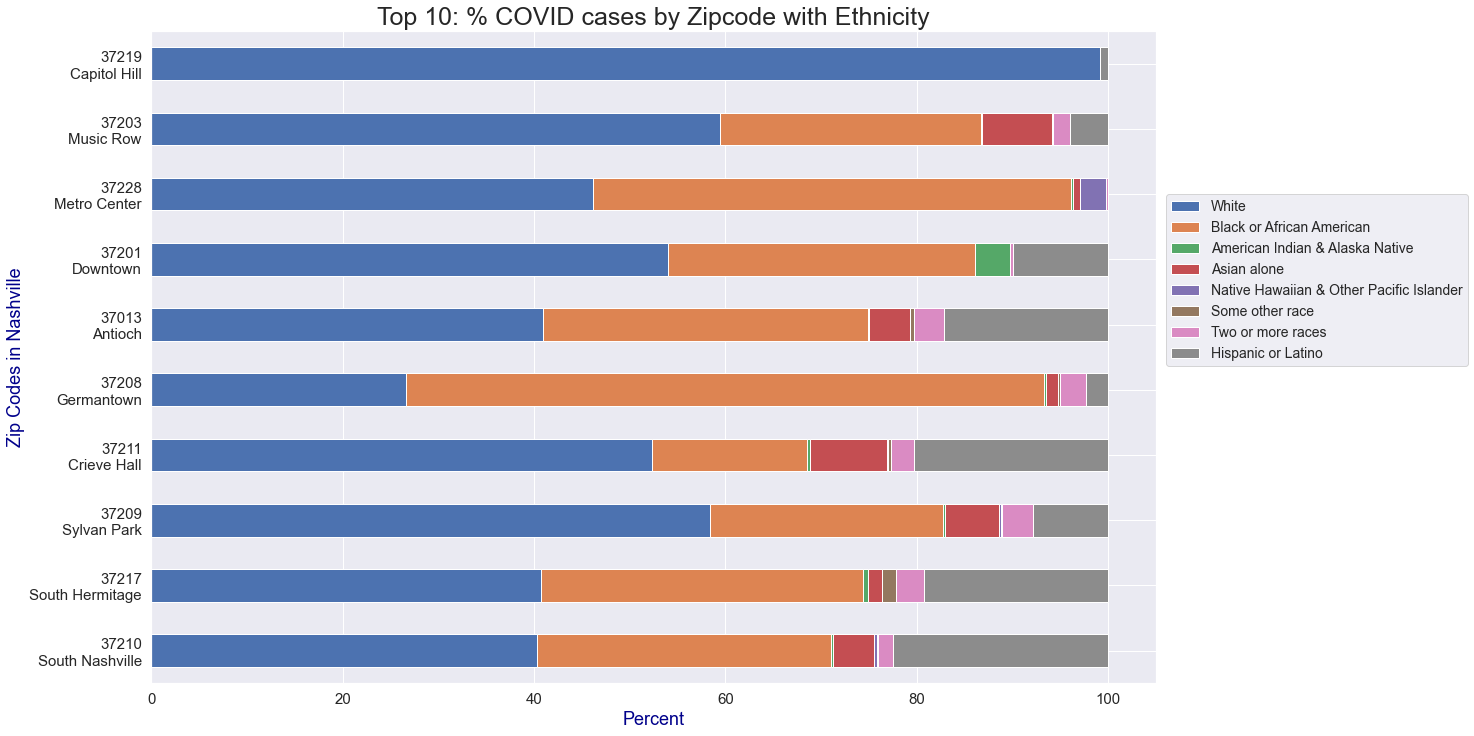

In [122]:
# sns.set()
# sns.set_context({"figure.figsize":(18,12)})

stack_bar.set_index('zip').plot(kind='barh',stacked=True,)
plt.title("Top 10: % COVID cases by Zipcode with Ethnicity", size = 25)
plt.xlabel("Percent",size =18, color='darkblue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel("Zip Codes in Nashville",size =18, color='darkblue')
plt.legend(bbox_to_anchor=(1.01, 0.75), loc=2,  prop={"size":14}, borderaxespad=0.)

plt.savefig('new_population_ethnicity.png',transparent=True)

##### Graph a Stackbar with the Top 10 Vaccine Zipcode Ethnicity information

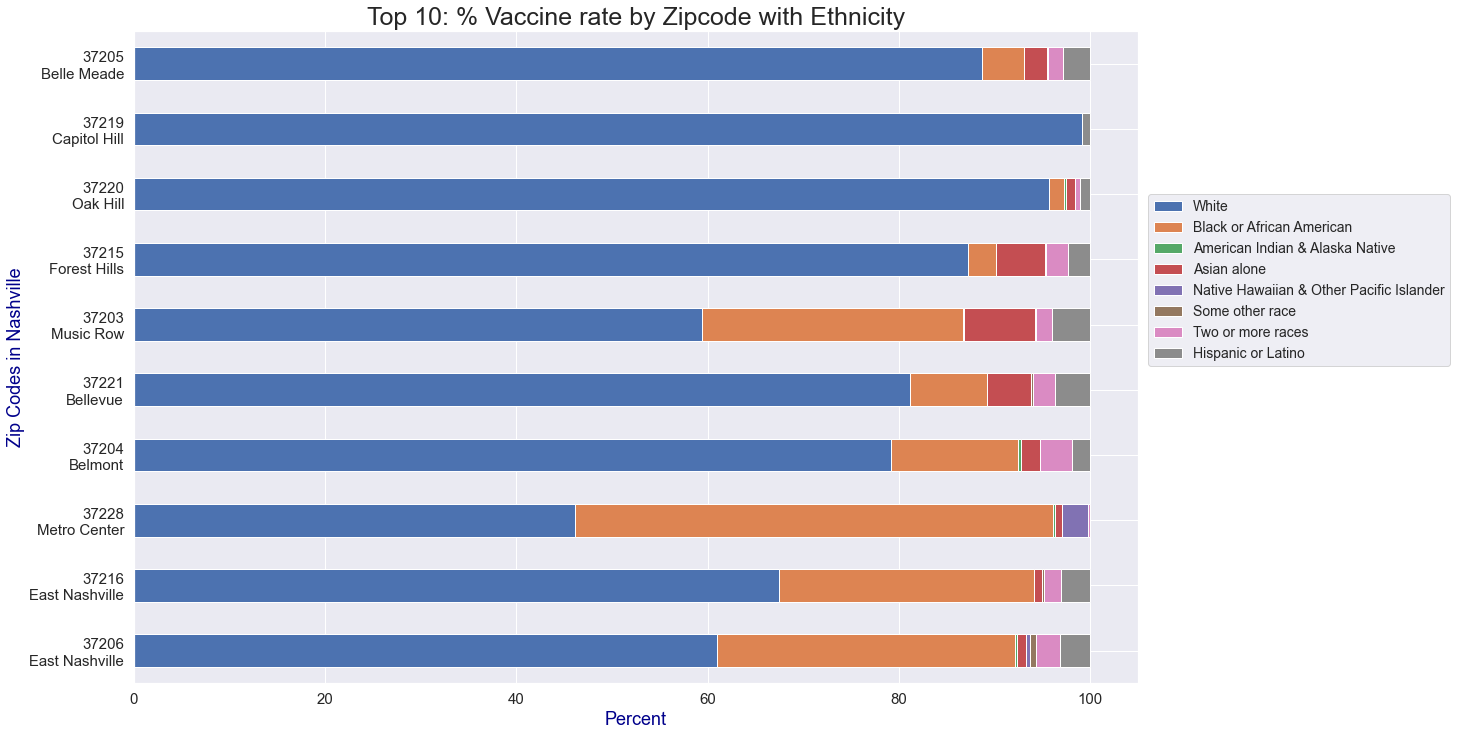

In [121]:
#sns.set()
#sns.set_context({"figure.figsize":(18,12)})

v_stack_bar.set_index('zip').plot(kind='barh',stacked=True,)
plt.title("Top 10: % Vaccine rate by Zipcode with Ethnicity", size = 25)
plt.xlabel("Percent",size =18, color='darkblue')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel("Zip Codes in Nashville",size =18, color='darkblue')
plt.legend(bbox_to_anchor=(1.01, 0.75), loc=2,  prop={"size":14}, borderaxespad=0.)

plt.savefig('top_vaccine_ethnicity.png',transparent=True)

##### Load geospatial zips

In [72]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [73]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

##### Merge Zipcodes Data Frame to the Covid_Vaccine Data Frame


In [74]:
cv_zip = pd.merge(left=zipcodes, right=c_v_zip, how='inner',left_on='zip', right_on='zip' )
cv_zip1 =pd.merge(left=cv_zip, right=neighborhood, how='inner',left_on='zip', right_on='zip' )
cv_zip1['zip1']= cv_zip1['zip']+ "\n" + cv_zip1['neighborhood']
cv_zip = cv_zip1.drop(columns='zip')
cv_zip = cv_zip.rename(columns={'zip1':'zip'})
cv_zip

,objectid,po_name,shape_stlength,shape_starea,geometry,cases,vaccines,population,perc_cases,perc_vacc,neighborhood,zip
0,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",4574,8520.0,40343.0,11.34,21.12,Madison,37115\nMadison
1,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",2011,7230.0,17848.0,11.27,40.51,East Nashville,37216\nEast Nashville
2,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",1786,6410.0,15452.0,11.56,41.48,Belmont,37204\nBelmont
3,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
4,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
5,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
6,29,BRENTWOOD,524.2364158788497,5803.0636596679687,"MULTIPOLYGON (((-86.72541 36.00934, -86.72540 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
7,28,BRENTWOOD,3028.3872771754991,553384.08331298828,"MULTIPOLYGON (((-86.68475 35.99279, -86.68488 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
8,27,BRENTWOOD,1678.1723515222479,156012.904296875,"MULTIPOLYGON (((-86.68367 35.99140, -86.68419 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood
9,44,BRENTWOOD,1315.615824819155,78289.863037109375,"MULTIPOLYGON (((-86.67793 35.98782, -86.67941 ...",231,352.0,56117.0,0.41,0.63,Brentwood,37027\nBrentwood


In [75]:
#Confirm it is a GEO frame
type(cv_zip)
#cv_zip = GeoDataFrame(cv_zip)

geopandas.geodataframe.GeoDataFrame

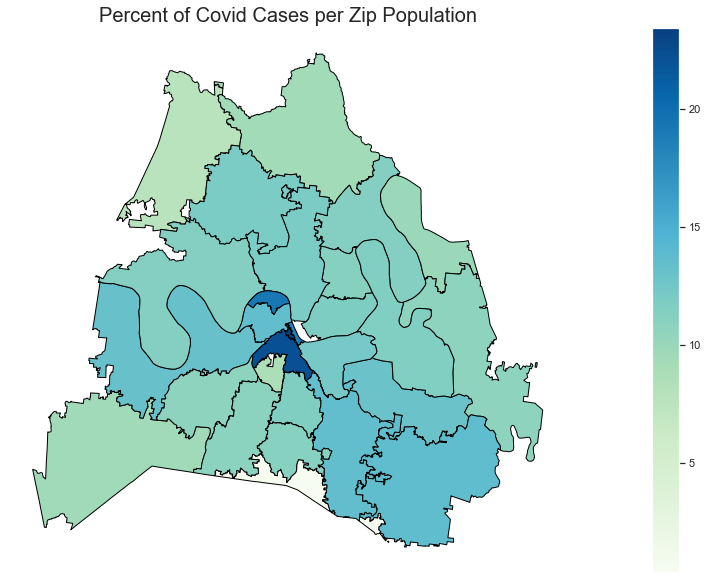

In [76]:


fig, ax = plt.subplots(figsize=(30,10))
cv_zip.plot(column ='perc_cases',
             cmap = 'GnBu', 
             edgecolor = 'black',
             ax = ax, 
             legend=True)
#cv_zip.set_geometry("zip", inplace = True)
ax.axis('off');
plt.title('Percent of Covid Cases per Zip Population', fontsize = 20)
plt.savefig('covid_perc_by_zip.png')

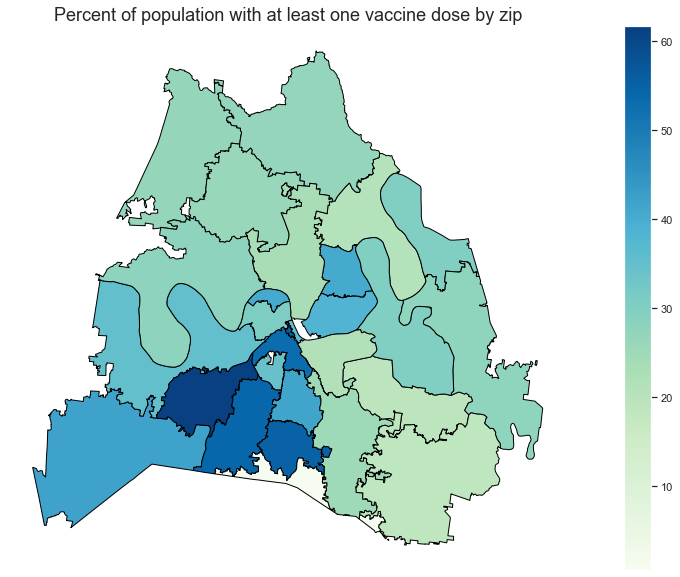

In [77]:
fig, ax = plt.subplots(figsize=(20,10))
cv_zip.plot(column = 'perc_vacc', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Percent of population with at least one vaccine dose by zip', fontsize = 18)
ax.axis('off')
plt.savefig('vac_by_zip_map.png')

In [78]:
#ethnicity_df = ethnicity_df.sort_values('White alone')
#ethnicity_df.plot.bar(x='zip', y='White alone')

#### Correlation dataframe to view our data

In [79]:
# Select zip,perc_cases, perc_vacc from c_v_zip dataframe
corr_df = c_v_zip.iloc[:,[0,4,5]]
# Merge it to bring in the ethnicity data
corr_df1 = pd.merge(left=corr_df, right=ethnicity_df, how='inner', left_on='zip',right_on='zip')
# corr_df1.info()
# print('------------------------------------------\n\n')
# print('After Changes to type\n\n')
# # change everything to a float and return Zip back to a string
# corr_df1 = corr_df1.astype(float)
# corr_df1.zip = corr_df1.zip.astype(str)
# corr_df1.info()
# #c_v_zip.head()

###### Add the total population number to corr_df1 for correlation graphs

In [80]:

total_df = pd.merge(left=corr_df1, right=pop_df, how='left', left_on='zip',right_on='zip')
total_df.info()
total_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   zip                                               29 non-null     object 
 1   perc_cases                                        29 non-null     float64
 2   perc_vacc                                         29 non-null     float64
 3   White alone                                       29 non-null     object 
 4   Black or African American alone                   29 non-null     object 
 5   American Indian and Alaska Native alone           29 non-null     object 
 6   Asian alone                                       29 non-null     object 
 7   Native Hawaiian and Other Pacific Islander alone  29 non-null     object 
 8   Some other race alone                             29 non-null     object 
 9   Two or more races      

,zip,perc_cases,perc_vacc,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,population
0,37219,23.40,55.29,99.133449,0.0,0.0,0.0,0.0,0.0,0.0,0.866551,1154
1,37203,22.17,53.20,59.419522,27.32092,0.079518,7.38851,0.0,0.092771,1.696375,4.002386,15091
2,37228,19.20,40.56,46.130031,50.03096,0.185759,0.743034,2.724458,0.0,0.185759,0.0,1615
3,37201,18.47,35.58,53.983941,32.118592,3.644225,0.0,0.0,0.0,0.370599,9.882644,1619
4,37013,13.64,18.85,40.923432,33.980335,0.096999,4.339436,0.0,0.38187,3.116225,17.161703,97939
5,37208,13.48,30.68,26.633724,66.731442,0.199878,1.254789,0.0,0.1277,2.74832,2.304147,18011
6,37211,13.47,25.25,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.31466,75955
7,37209,13.12,35.17,58.36437,24.379268,0.217256,5.63832,0.175874,0.126733,3.310573,7.787606,38664
8,37217,12.96,19.36,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,30146
9,37210,12.18,21.72,40.271336,30.762987,0.2609,4.203386,0.353664,0.121753,1.524814,22.50116,17248


In [81]:
total_df = total_df.astype(float)
total_df.zip = total_df.zip.astype(str)
total_df.info()
total_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   zip                                               29 non-null     object 
 1   perc_cases                                        29 non-null     float64
 2   perc_vacc                                         29 non-null     float64
 3   White alone                                       29 non-null     float64
 4   Black or African American alone                   29 non-null     float64
 5   American Indian and Alaska Native alone           29 non-null     float64
 6   Asian alone                                       29 non-null     float64
 7   Native Hawaiian and Other Pacific Islander alone  29 non-null     float64
 8   Some other race alone                             29 non-null     float64
 9   Two or more races      

,zip,perc_cases,perc_vacc,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,population
0,37219.0,23.40,55.29,99.133449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866551,1154.0
1,37203.0,22.17,53.20,59.419522,27.320920,0.079518,7.388510,0.000000,0.092771,1.696375,4.002386,15091.0
2,37228.0,19.20,40.56,46.130031,50.030960,0.185759,0.743034,2.724458,0.000000,0.185759,0.000000,1615.0
3,37201.0,18.47,35.58,53.983941,32.118592,3.644225,0.000000,0.000000,0.000000,0.370599,9.882644,1619.0
4,37013.0,13.64,18.85,40.923432,33.980335,0.096999,4.339436,0.000000,0.381870,3.116225,17.161703,97939.0
5,37208.0,13.48,30.68,26.633724,66.731442,0.199878,1.254789,0.000000,0.127700,2.748320,2.304147,18011.0
6,37211.0,13.47,25.25,52.337568,16.234613,0.296228,8.016589,0.076361,0.381805,2.342176,20.314660,75955.0
7,37209.0,13.12,35.17,58.364370,24.379268,0.217256,5.638320,0.175874,0.126733,3.310573,7.787606,38664.0
8,37217.0,12.96,19.36,40.728455,33.712599,0.524116,1.446295,0.019903,1.369999,3.025277,19.173356,30146.0
9,37210.0,12.18,21.72,40.271336,30.762987,0.260900,4.203386,0.353664,0.121753,1.524814,22.501160,17248.0


In [82]:
#Select only the necessary columns to carried out a correlation
corr_df2 = corr_df1.iloc[:,[1,2,3,4,10]]
corr_df2.head()

,perc_cases,perc_vacc,White alone,Black or African American alone,Hispanic or Latino
0,23.40,55.29,99.133449,0.0,0.866551
1,22.17,53.20,59.419522,27.32092,4.002386
2,19.20,40.56,46.130031,50.03096,0.0
3,18.47,35.58,53.983941,32.118592,9.882644
4,13.64,18.85,40.923432,33.980335,17.161703


In [83]:
corr_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   perc_cases                       29 non-null     float64
 1   perc_vacc                        29 non-null     float64
 2   White alone                      29 non-null     object 
 3   Black or African American alone  29 non-null     object 
 4   Hispanic or Latino               29 non-null     object 
dtypes: float64(2), object(3)
memory usage: 1.4+ KB


In [84]:
#corr_df2['White alone'] =corr_df2['White alone'].astype(float)
#corr_df2['Black or African American alone'] = corr_df2['Black or African American alone'].astype(float)
corr_df2 = corr_df2.astype(float)
corr_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   perc_cases                       29 non-null     float64
 1   perc_vacc                        29 non-null     float64
 2   White alone                      29 non-null     float64
 3   Black or African American alone  29 non-null     float64
 4   Hispanic or Latino               29 non-null     float64
dtypes: float64(5)
memory usage: 1.4 KB


In [85]:
total_df[['perc_cases','perc_vacc','White alone','Black or African American alone','Hispanic or Latino']].corr()

,perc_cases,perc_vacc,White alone,Black or African American alone,Hispanic or Latino
perc_cases,1.000000,0.595913,-0.274325,0.298068,0.082817
perc_vacc,0.595913,1.000000,0.310163,-0.190661,-0.408783
White alone,-0.274325,0.310163,1.000000,-0.938080,-0.504309
Black or African American alone,0.298068,-0.190661,-0.938080,1.000000,0.193640
Hispanic or Latino,0.082817,-0.408783,-0.504309,0.193640,1.000000


##### Graphs of White Population correlation

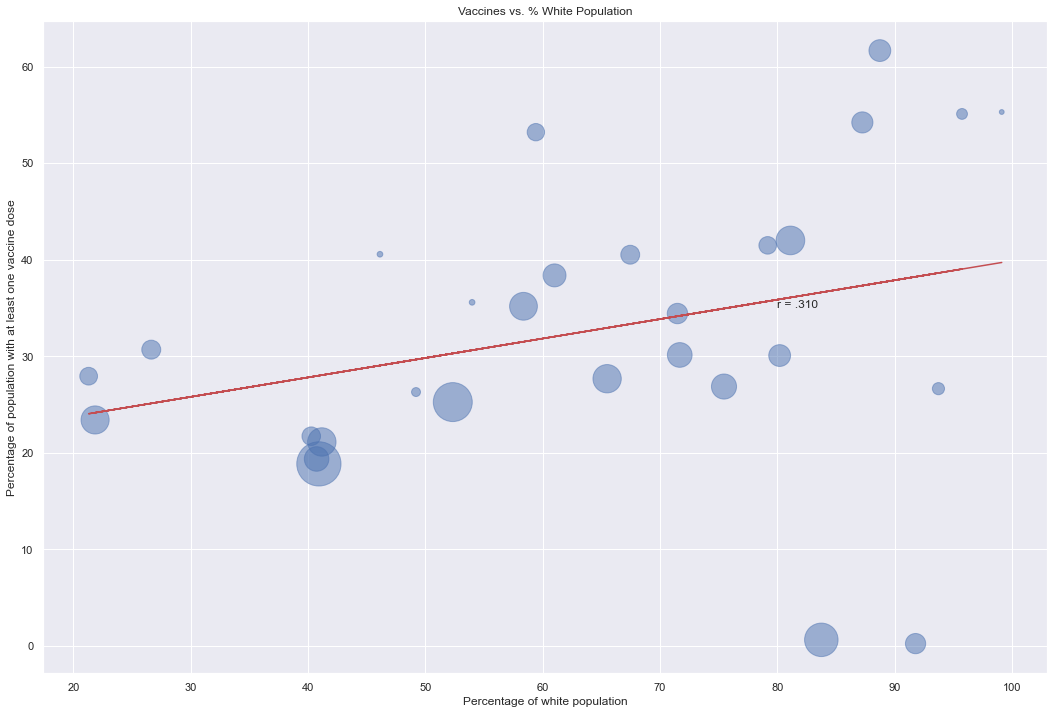

In [86]:
a = total_df['population']
plt.scatter('White alone', 'perc_vacc', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Vaccines vs. % White Population')
plt.xlabel("Percentage of white population")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = total_df['White alone']
y = total_df['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(80, 35, 'r = .310')
plt.savefig('white_pop_vs_vac.png')

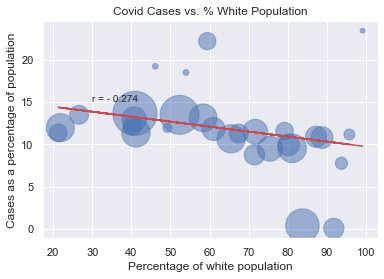

In [114]:
a = total_df['population']
plt.scatter('White alone', 'perc_cases', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Covid Cases vs. % White Population')
plt.xlabel("Percentage of white population")
plt.ylabel('Cases as a percentage of population')
x = total_df['White alone']
y = total_df['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(30, 15, 'r = - 0.274')
plt.savefig('white_pop_vs_covid_cases.png')

##### Graphs of Black Population correlation

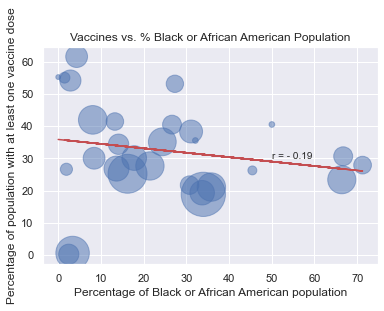

In [115]:
a = total_df['population']
plt.scatter('Black or African American alone', 'perc_vacc', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Vaccines vs. % Black or African American Population')
plt.xlabel("Percentage of Black or African American population")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = total_df['Black or African American alone']
y = total_df['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(50, 30, 'r = - 0.19')
plt.savefig('black_pop_vs_vac.png')

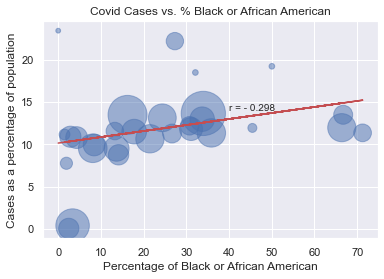

In [116]:
a = total_df['population']
plt.scatter('Black or African American alone', 'perc_cases', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Covid Cases vs. % Black or African American')
plt.xlabel("Percentage of Black or African American")
plt.ylabel('Cases as a percentage of population')
x = total_df['Black or African American alone']
y = total_df['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(40, 14, 'r = - 0.298')
plt.savefig('black_pop_vs_covid_cases.png')

##### Graphs of Hispanic Population correlation

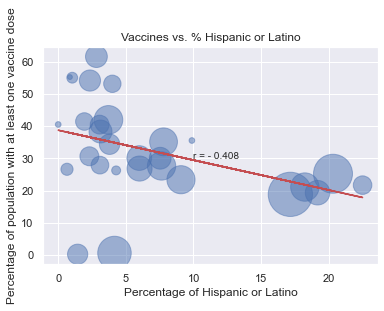

In [117]:
a = total_df['population']
plt.scatter('Hispanic or Latino', 'perc_vacc', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Vaccines vs. % Hispanic or Latino')
plt.xlabel("Percentage of Hispanic or Latino")
plt.ylabel('Percentage of population with at least one vaccine dose')
x = total_df['Hispanic or Latino']
y = total_df['perc_vacc']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(10, 30, 'r = - 0.408')
plt.savefig('hispanic_pop_vs_vac.png')

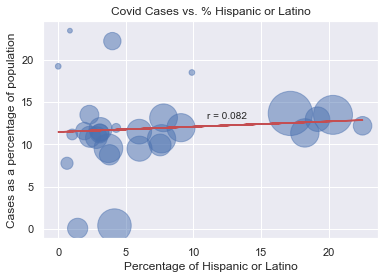

In [118]:
a = total_df['population']
plt.scatter('Hispanic or Latino', 'perc_cases', marker='o', data=total_df, s=a/50, alpha=.5)
plt.title('Covid Cases vs. % Hispanic or Latino')
plt.xlabel("Percentage of Hispanic or Latino")
plt.ylabel('Cases as a percentage of population')
x = total_df['Hispanic or Latino']
y = total_df['perc_cases']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.text(11, 13, 'r = 0.082')
plt.savefig('black_pop_vs_covid_cases.png')